# DS-SF-42 | 03 | Exploratory Data Analysis | Codealong | Starter Code

In this code-along we will need the seaborn plotting package. Seaborn is built-around matplotlib to make some functionality much more user friendly.

To install a package, open terminal (or git-bash for Windows users).

Run:

```bash
conda install -y seaborn
```

Conda is a package manager, similar to `pip`.

In [13]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Part A | Independent Review (20 minutes) | The _pandas_ Library

In [ ]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dave', 'Eve', 'Frank'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'age': [24, 34, 44, 41, 52, 43],
    'marital_status': [0, 2, 1, 2, 0, 1]}).\
        set_index('name')

In [ ]:
df

The following exerices that are marked with <font color="blue">(INDPENDENT)</font> are review of the Pandas material from Thursday. Take a stab at doing them on your own. Feel free to use the [inclass notebook](https://github.com/ga-students/DS-SF-42/blob/master/classes/02/notebooks/INCLASS-codealong-02-the-pandas-library-starter-code.ipynb) as a reference.

> ### <font color="blue">(INDPENDENT)</font> Question 1.  Subset the dataframe on the age and gender columns

In [ ]:
# TODO

> ### <font color="blue">(INDPENDENT)</font> Question 2.  Subset the dataframe on the age column alone, first as a `DataFrame`, then as a `Series`

In [ ]:
# TODO (DataFrame)

In [ ]:
# TODO (Series)

> ### <font color="blue">(INDPENDENT)</font> Question 3.  Subset the dataframe on the rows Bob and Carol

In [ ]:
# TODO

> ### <font color="blue">(INDPENDENT)</font> Question 4.  Subset the dataframe on the row Eve alone, first as a `DataFrame`, then as a `Series`

In [ ]:
# TODO (DataFrame)

In [ ]:
# TODO (Series)

> ### <font color="blue">(INDPENDENT)</font> Question 5.  How old is Frank?

In [ ]:
# TODO

> ### <font color="blue">(INDPENDENT)</font> Question 6.  What is the men’s mean age, the women’s median age?

In [ ]:
# TODO

## Part B

- `.mean()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)
- `.var()`, `.std()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html)

In [4]:
df = pd.read_csv('../datasets/dataset-04-zillow.csv', index_col = 'ID')

### `Series.mean()` - Compute the `Series` mean value

In [ ]:
df.SalePrice.mean()

> #### Activity: What's `Size`'s mean?

In [ ]:
# TODO

> #### Activity: What fraction of the properties sold in the dataset are studios?

In [ ]:
# TODO

### `DataFrame.mean()` - Compute the `DataFrame` mean value

In [ ]:
# TODO

### `.var()` - Compute the unbiased variance (normalized by `N-1` by default)

In [ ]:
# TODO

> #### Activity: What's the variance for the number of beds in the dataset?

In [ ]:
# TODO

### `.std()` - Compute the unbiased standard deviation (normalized by `N-1` by default)

In [ ]:
# TODO

> #### Activity: What's the standard deviation for the number of beds in the dataset?

In [ ]:
# TODO

## Part C

- `.median()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html)
- `.count()`, `.sum()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sum.html)
- `.count()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
- `.min()`, `.max()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html)
- `.quantile()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.quantile.html)
- `.describe()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### `.median()` - Compute the median value

In [ ]:
# TODO

> #### Activity: What's the median sale price for properties in the dataset?

In [ ]:
# TODO

### `.count()` - Compute the number of rows/observations without `NaN` and `.sum()` - Compute the sum of the values

In [ ]:
df.count()

In [ ]:
df.IsAStudio.count()

Which leaves 14 houses for which we don't know if they are studios or not.

In [ ]:
df.IsAStudio.dropna().shape[0] + df.IsAStudio.isnull().sum()

In [ ]:
df.IsAStudio.sum()

29 properties are studios.

### `.min()` and `.max()` - Compute the minimum and maximum values

In [ ]:
df.min()

In [ ]:
df.max()

> #### <font color="blue">(INDPENDENT)</font> Activity: What are properties that were sold at the lowest price?  At what price?

In [ ]:
# TODO

> #### <font color="blue">(INDPENDENT)</font> Activity: What are properties that were sold at the highest price?  At what price?

In [ ]:
# TODO

### `.quantile()` - Compute values at the given quantile

In [ ]:
df.quantile(.5)

By definition, the median is the 50% quantile.

In [ ]:
df.median()

In [ ]:
df.quantile(.25)

In [ ]:
df.quantile(.75)

### `.describe()` - Generate various summary statistics

In [ ]:
df.describe()

In [ ]:
df.SalePrice.describe()

In [ ]:
df.Address.describe()

## Part D

- Boxplots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)

In [ ]:
df.SalePrice.plot(kind = 'box', figsize = (8, 8))

In [ ]:
df[['SalePrice']].boxplot(figsize = (8, 8))

> In the same plot, plot the boxplots of `Beds` and `Baths`

In [ ]:
# TODO

## Part E

- Histograms
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html)

In [ ]:
df.Beds.plot(kind = 'hist', figsize = (8, 8))

In [ ]:
df.Beds.hist(figsize = (8, 8))

## <font color="blue">Discussion</font> - what are some benefits of boxplots compared to other univariate plots, and descriptive statistics?

> #### Activity: In the same plot, plot the histograms of `Beds` and `Baths`

In [ ]:
# TODO

## Part F

- `.mode()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mode.html)

### `.mode()` - Compute the mode value(s)

In [ ]:
df.mode()

In [ ]:
df.Address.mode()

In [ ]:
df.Baths.mode()

The `.mode()` method gets the mode(s) of each element along the columns.  Empty if nothing has 2+ occurrences. Adds a row for each mode per label, fills in gaps with `NaN`.  Note that there could be multiple values returned in the columns (when more than one value share the maximum frequency), which is the reason why a dataframe is returned.

## Part G

- `.corr()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html)
- Heatmaps
  - (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.matshow)
- Scatter plots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)
- Scatter matrices
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot)

In [ ]:
df.corr()

In [ ]:
df.Beds.corr(df.Baths)

### Heatmaps

In [15]:
corr = df.corr()

corr

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
Beds,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
Baths,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


In [ ]:
# TODO

Let's pretty this up using the seaborn package.

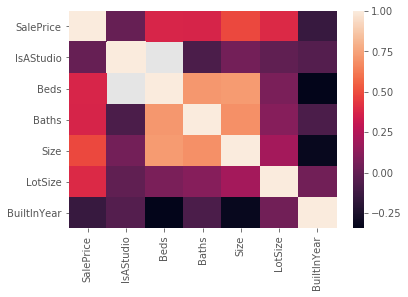

In [16]:
sns.heatmap(corr)

### Scatter plots

In [ ]:
df.plot(kind = 'scatter', x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

In [ ]:
df.plot.scatter(x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

### Pair scatterplots with Seaborn

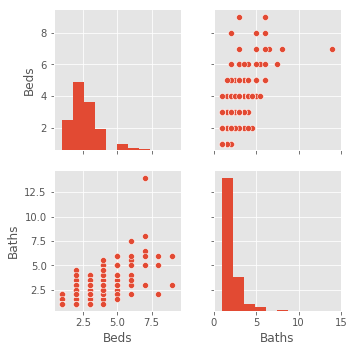

In [22]:
sns.pairplot(df[['Beds', 'Baths']].dropna())

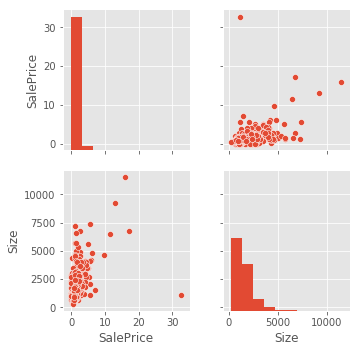

In [23]:
sns.pairplot(df[['SalePrice', 'Size']].dropna())

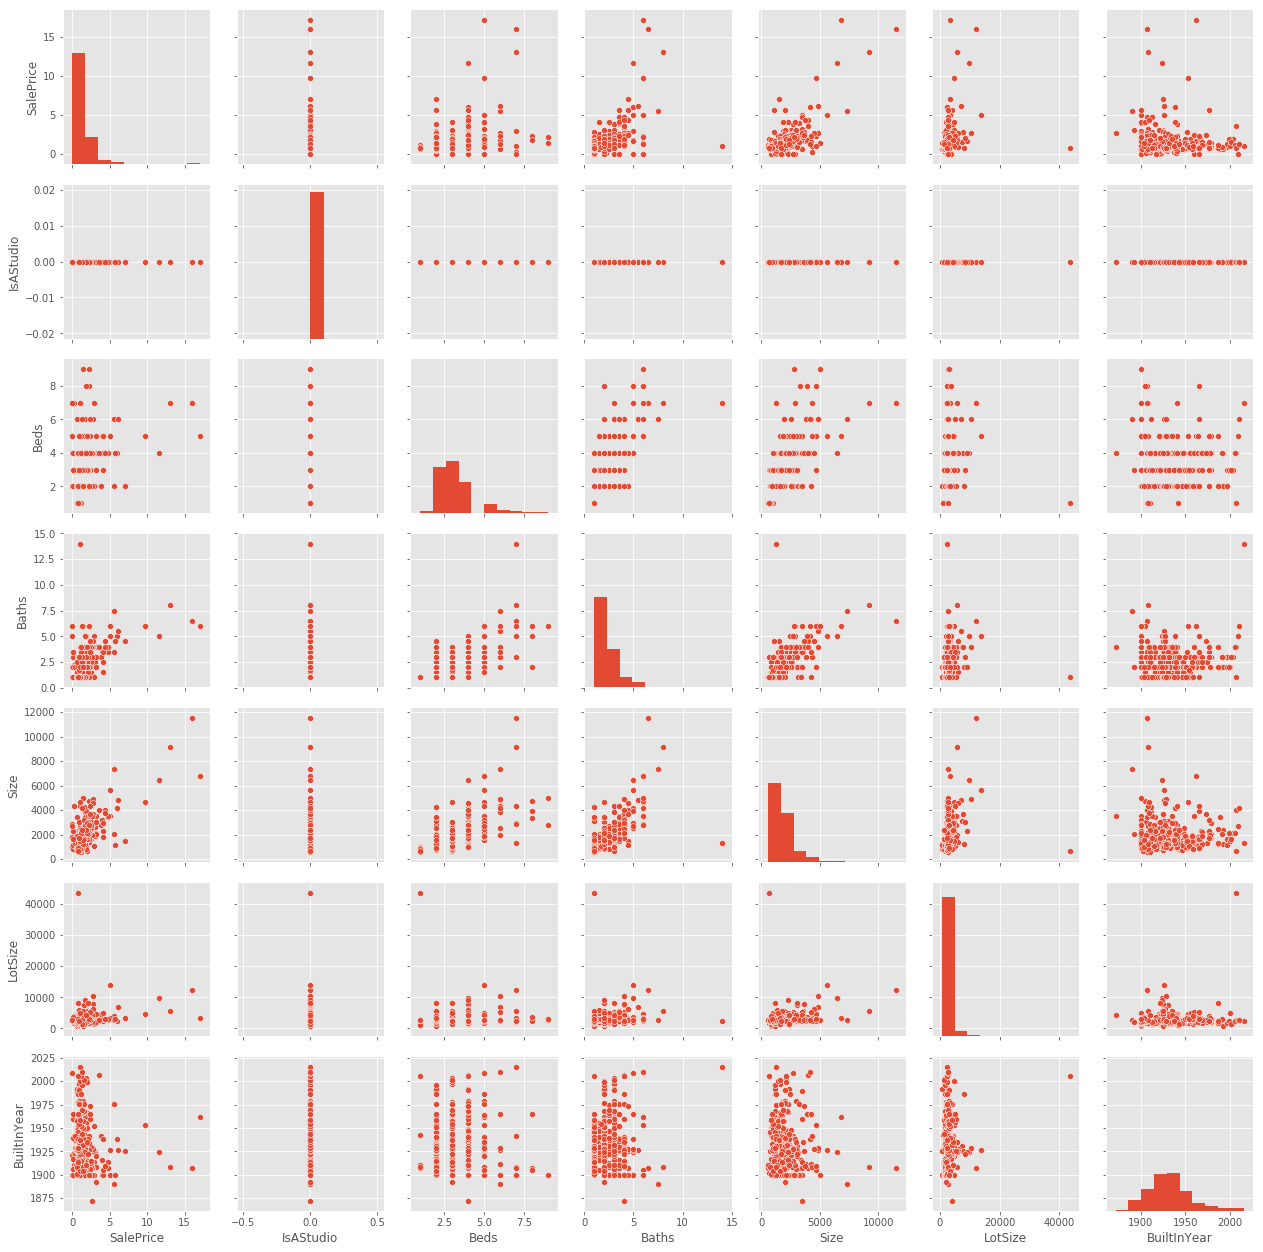

In [24]:
sns.pairplot(df.dropna())

### <font color="blue">Check</font> - why are plots along the diagonal not scatters?

## Part H

- `.value_counts()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
- `.crosstab()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

> #### Activity: Reproduce the `Beds` histogram above.  For each possible number of beds, how many properties share that bed count?

In [ ]:
# TODO

> Careful on checking for `NaN` values!

In [ ]:
# TODO

> #### Activity: Create a frequency table for `Baths` over `Beds`

In [ ]:
# TODO

> #### Activity: Create a frequency table for `Beds` and `Baths` (together) over the centry the houses were built

In [ ]:
# TODO